In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

In [2]:
# Retrieve data files
happiness_2019_2020_file_path = "../data/TOTAL_2019_2020_clean.csv"

# Read the data files
happiness_2019_2020 = pd.read_csv(happiness_2019_2020_file_path)

In [3]:
# Create two data frames for each file
happiness_df = pd.DataFrame(happiness_2019_2020)
print(happiness_df)


         Country              Region  Year  Happiness Rank  Happiness Score  \
0        Finland      Western Europe  2019               1           7.8087   
1        Denmark      Western Europe  2019               2           7.6456   
2    Switzerland      Western Europe  2019               3           7.5599   
3        Iceland      Western Europe  2019               4           7.5045   
4         Norway      Western Europe  2019               5           7.4880   
..           ...                 ...   ...             ...              ...   
297      Lesotho  Sub-Saharan Africa  2020             145           3.5120   
298     Botswana  Sub-Saharan Africa  2020             146           3.4650   
299       Rwanda  Sub-Saharan Africa  2020             147           3.4150   
300     Zimbabwe  Sub-Saharan Africa  2020             148           3.1450   
301  Afghanistan          South Asia  2020             149           2.5230   

     Dystopia Residual  GDP per capita  Social supp

In [4]:
# Remove extra columns
data_df = happiness_df.drop(["Country", "Region", "Year", "Happiness Rank"], axis= 1)
data_df.head()

,Happiness Score,Dystopia Residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.8087,2.7628,1.2852,1.4995,0.9613,0.6623,0.1597,0.4779
1,7.6456,2.4327,1.3269,1.5034,0.9793,0.6650,0.2428,0.4953
2,7.5599,2.3503,1.3908,1.4724,1.0405,0.6290,0.2691,0.4079
3,7.5045,2.4607,1.3265,1.5476,1.0008,0.6620,0.3623,0.1445
4,7.4880,2.1683,1.4242,1.4952,1.0081,0.6702,0.2880,0.4341


In [5]:
column_names= []
for col in data_df.columns:
    column_names.append(col)
column_names.remove("Happiness Score")
print(column_names)

['Dystopia Residual', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


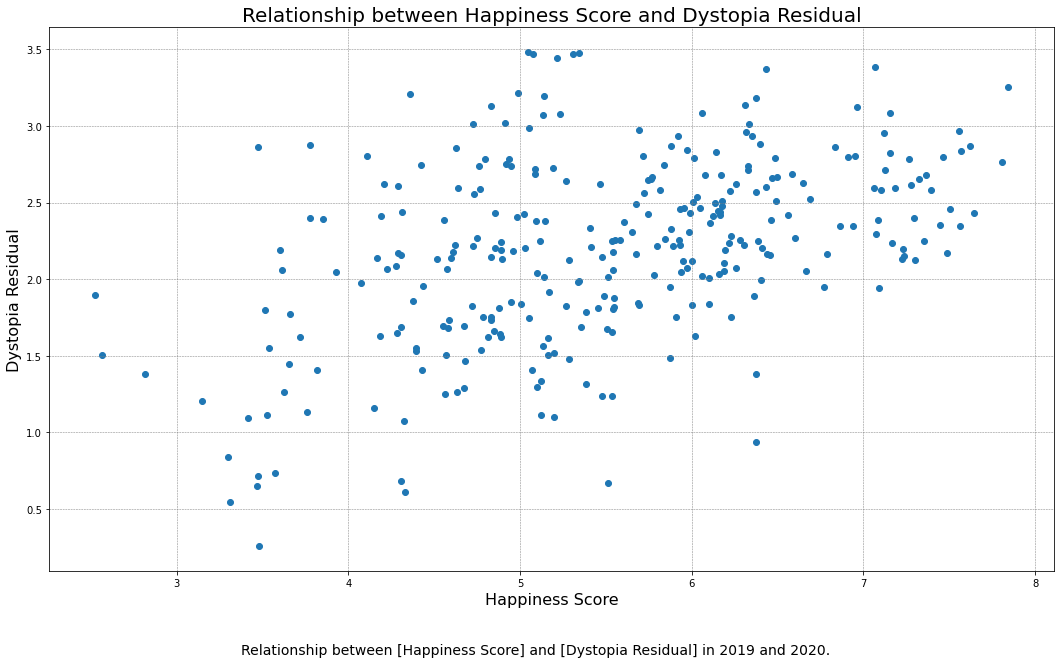

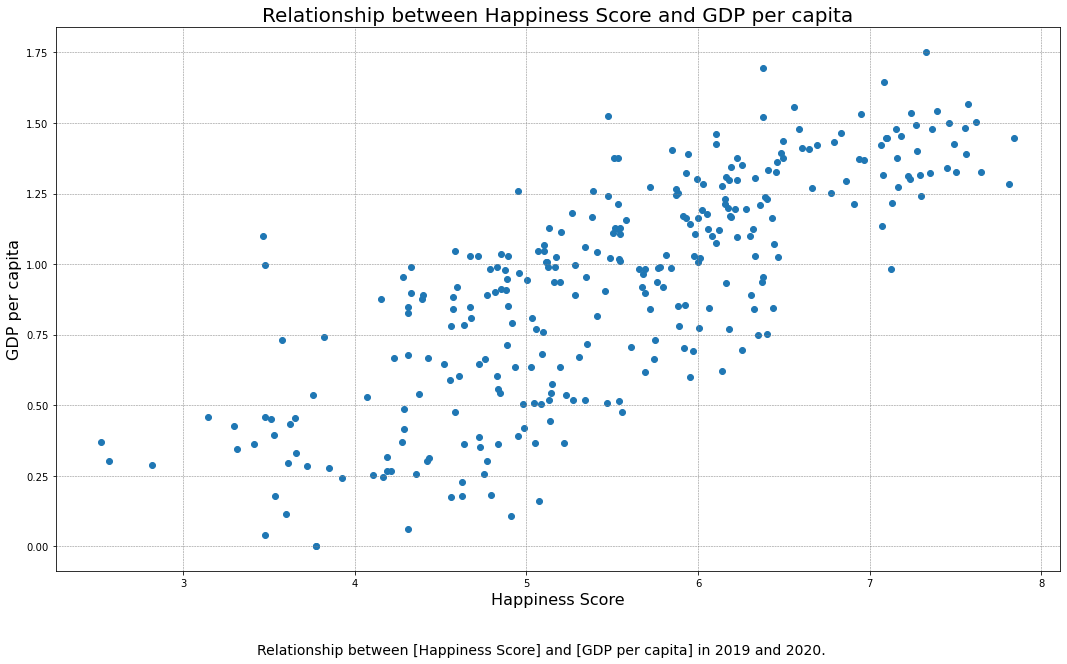

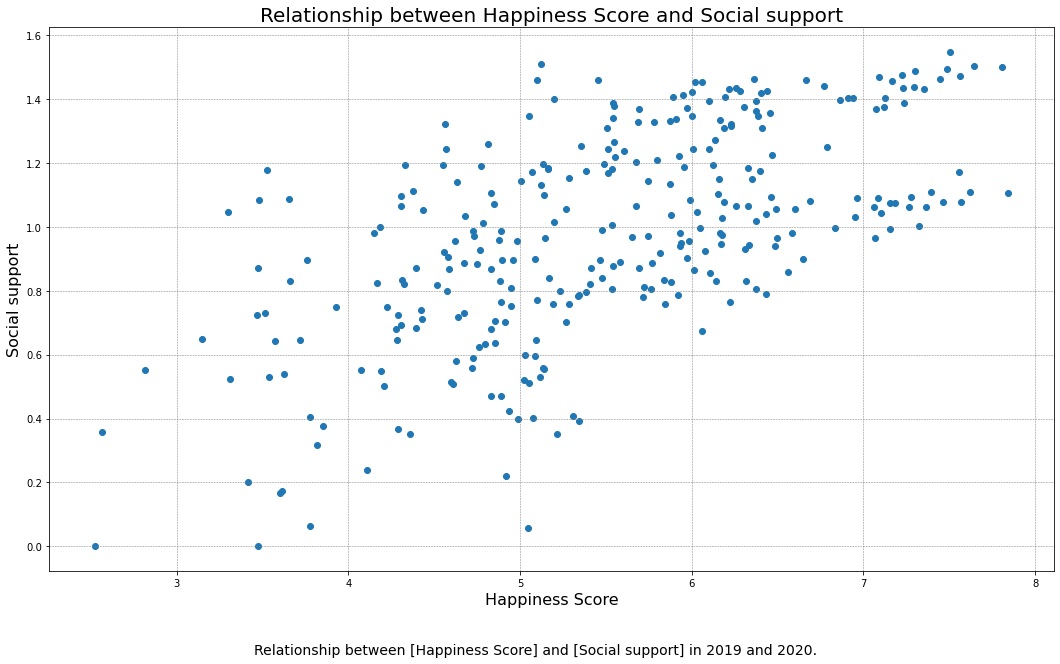

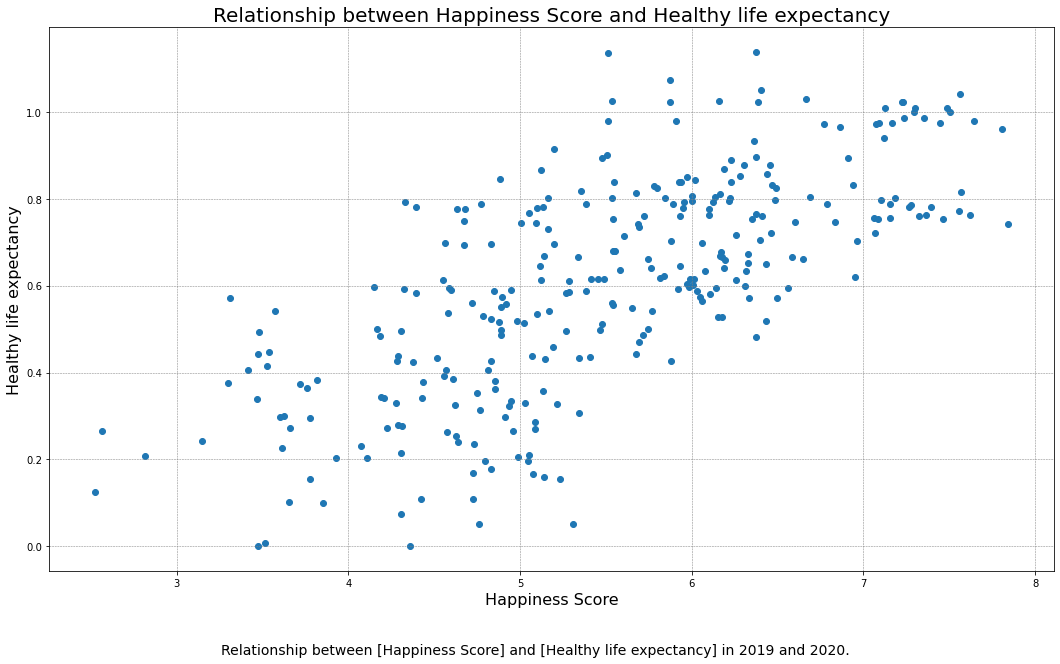

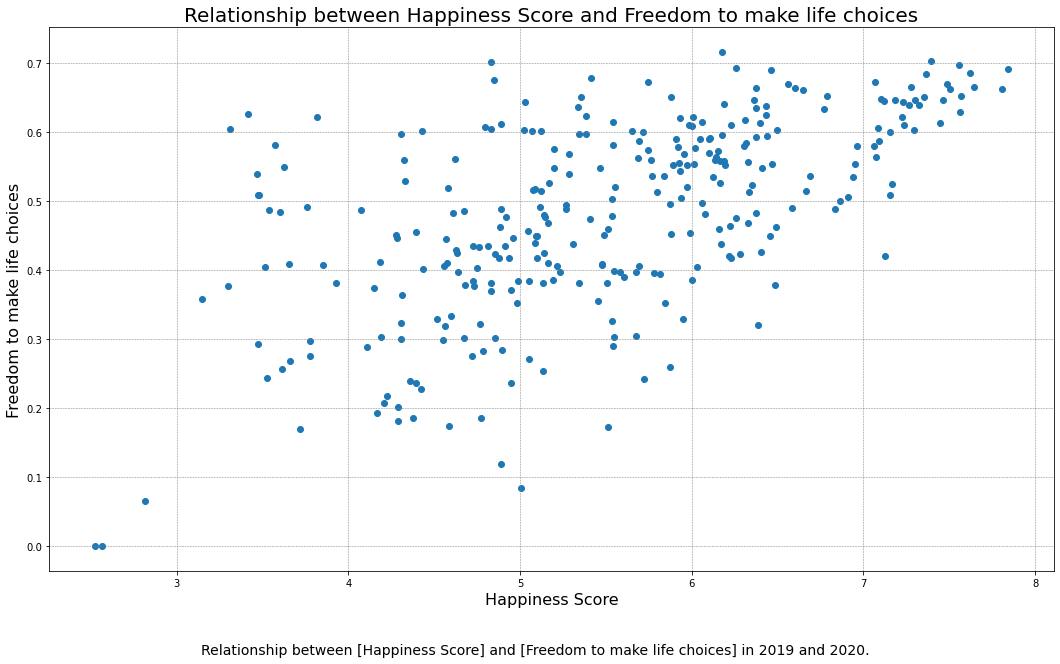

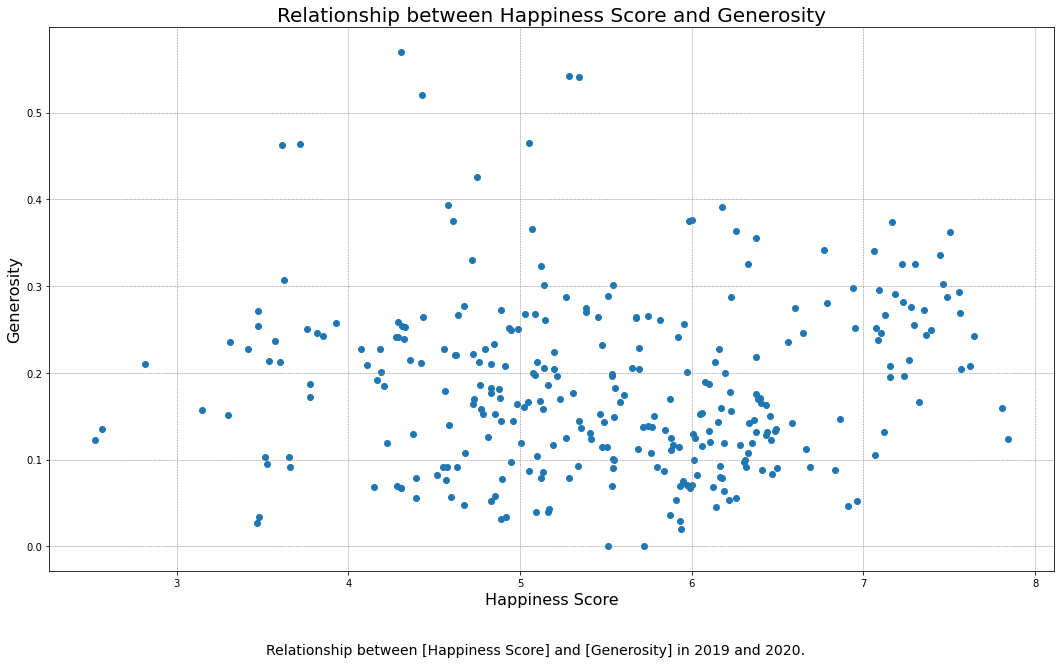

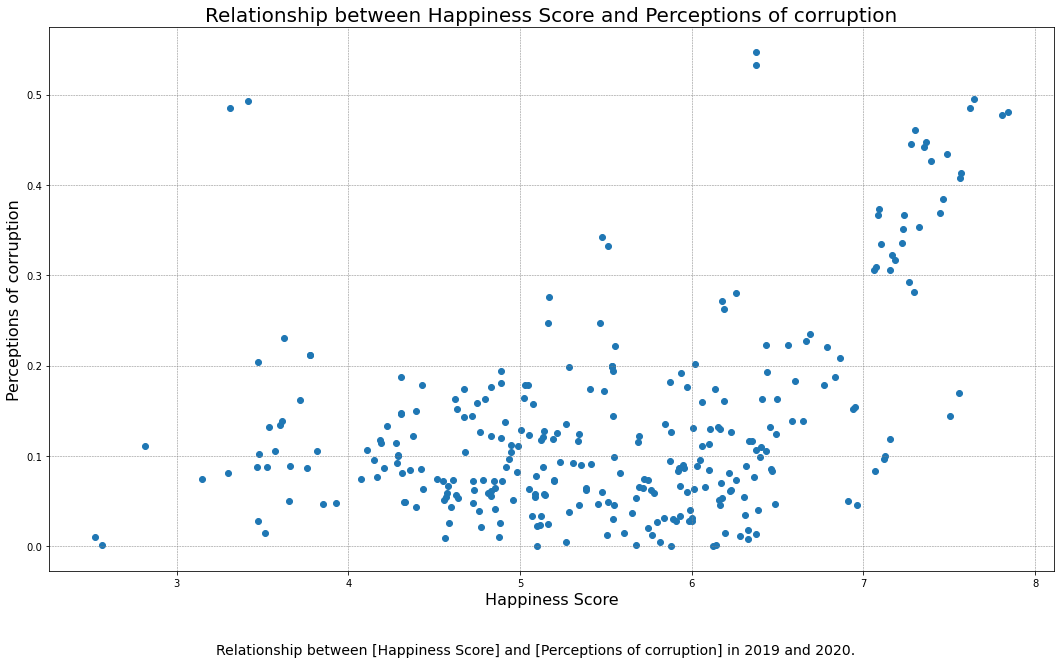

In [6]:
#Scatter plots for happiness score correlation
for type in column_names:
    # Set figure size
    plt.figure(figsize= (18,10))
    # Make scatter plot
    plt.scatter(data_df["Happiness Score"], data_df[type])
    # Set title
    plt.title (f"Relationship between Happiness Score and {type}", fontsize=20)
    # Set x-axis label
    plt.xlabel("Happiness Score", fontsize= 16)
    # Set y-axis label
    plt.ylabel(type, fontsize= 16)
    # Add grid to plot
    plt.grid(color= "gray", linestyle= "--", linewidth= 0.5)
    #Set text to be added with plt.figtext
    txt= (f"Relationship between [Happiness Score] and [{type}] in 2019 and 2020.")
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment= 'center', fontsize= 14)
    # Save figure
    plt.savefig(f"outputs/{type}_scatter.png", dpi= 600, transparent= False)
    # Display plot
    plt.show()


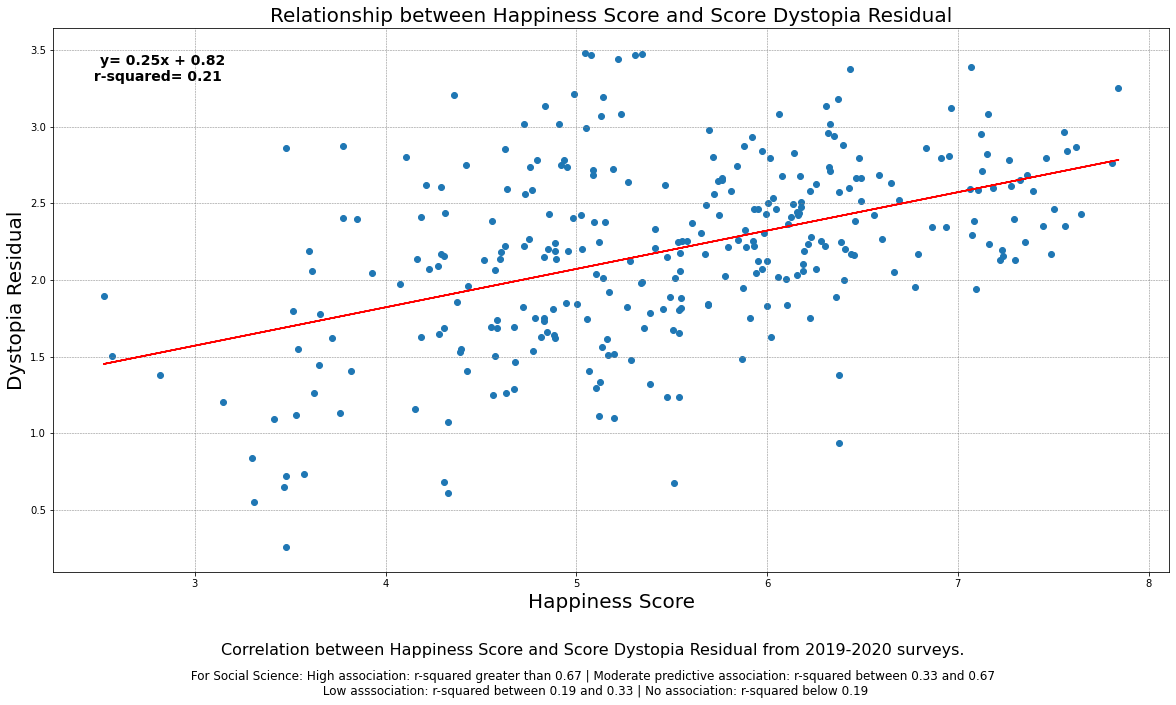

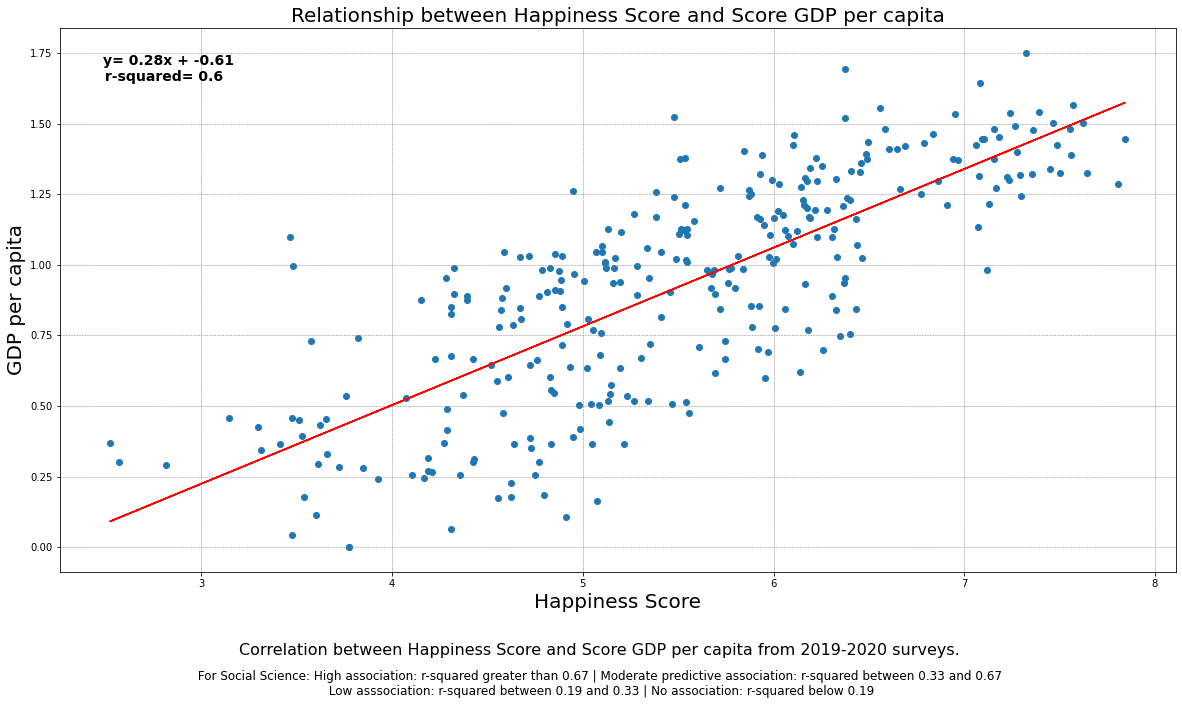

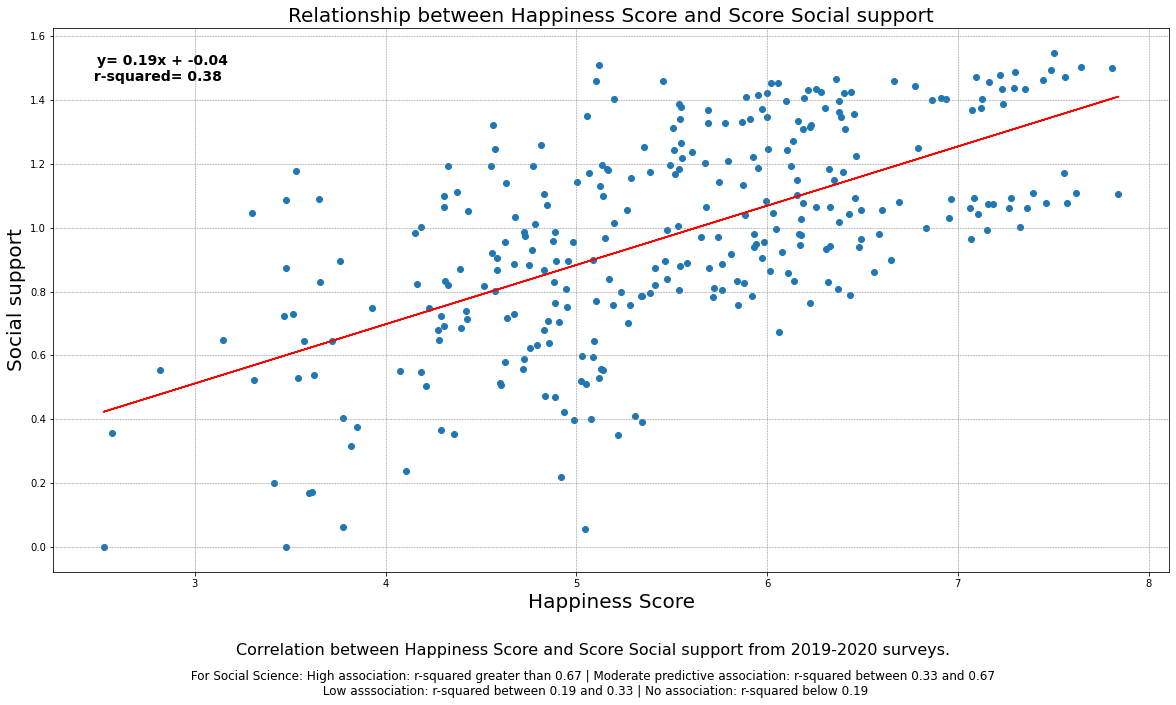

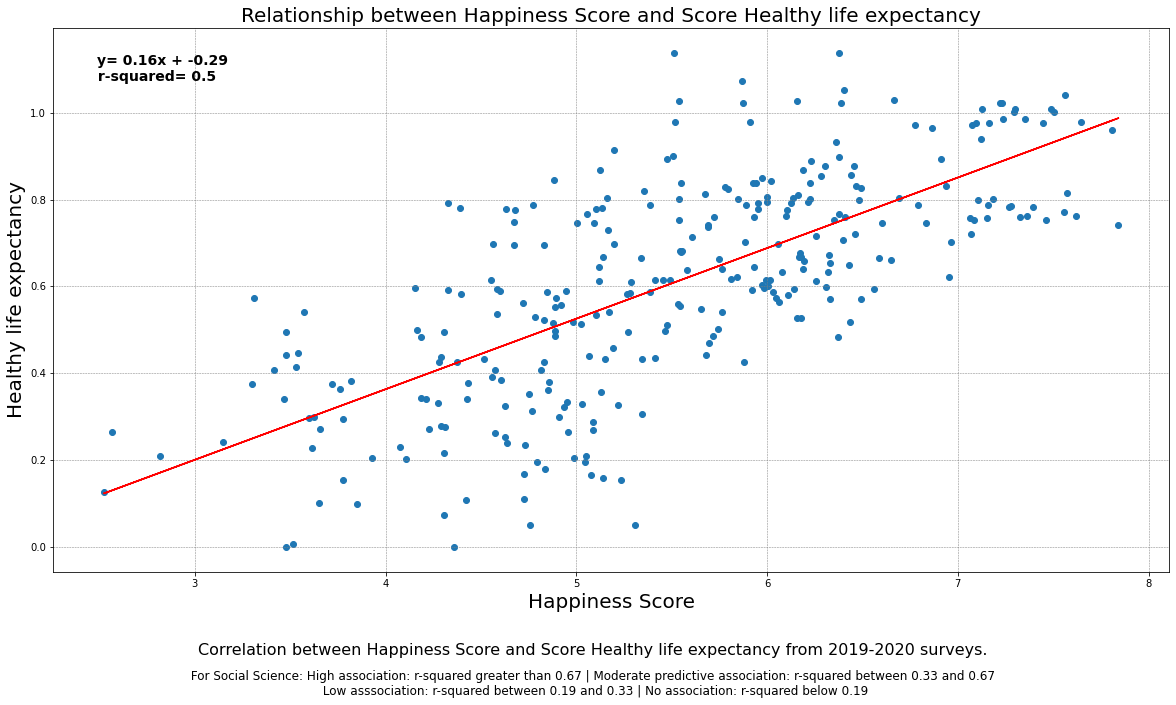

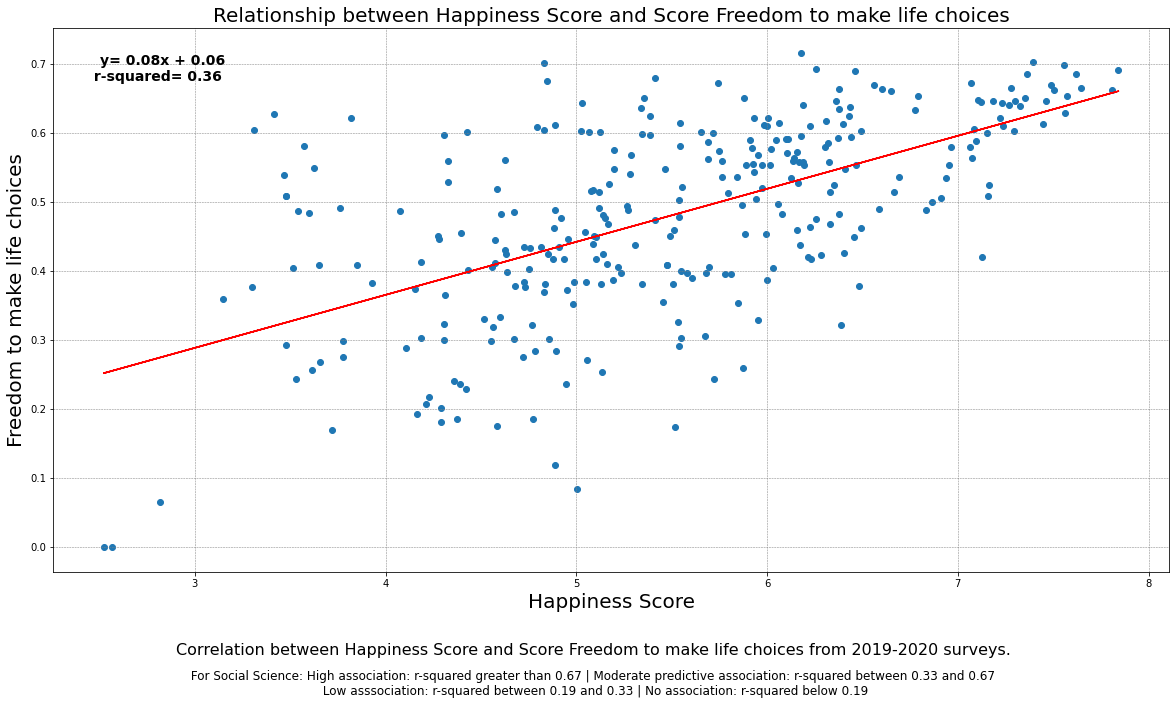

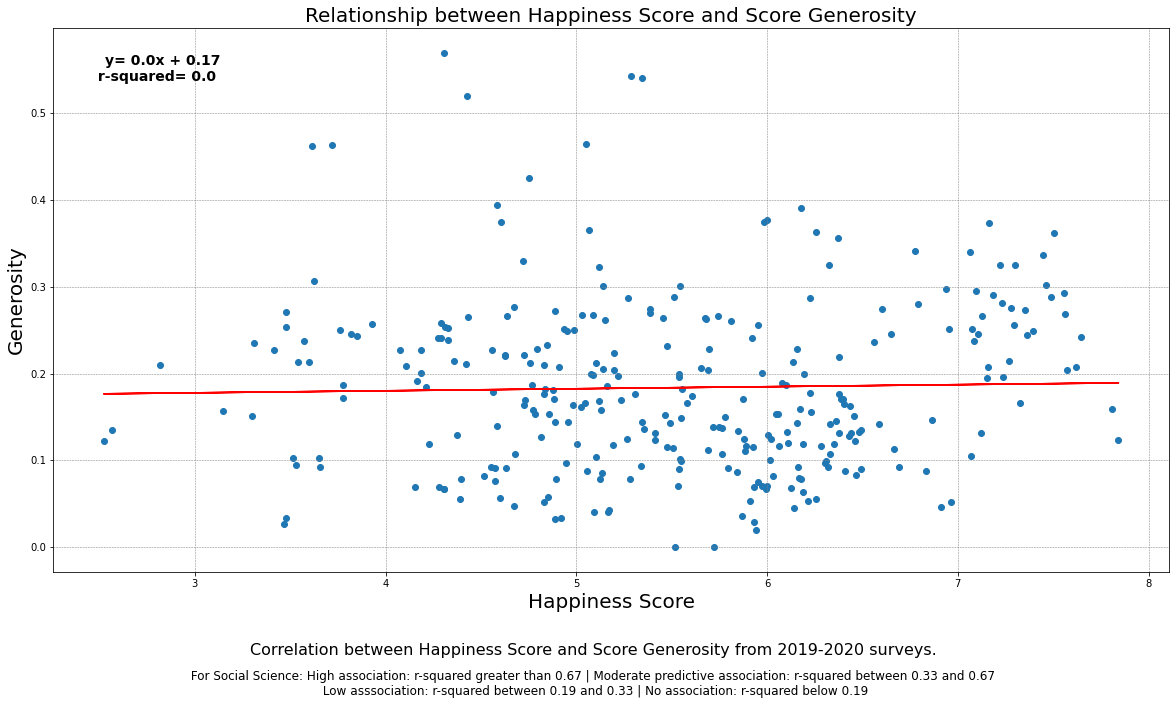

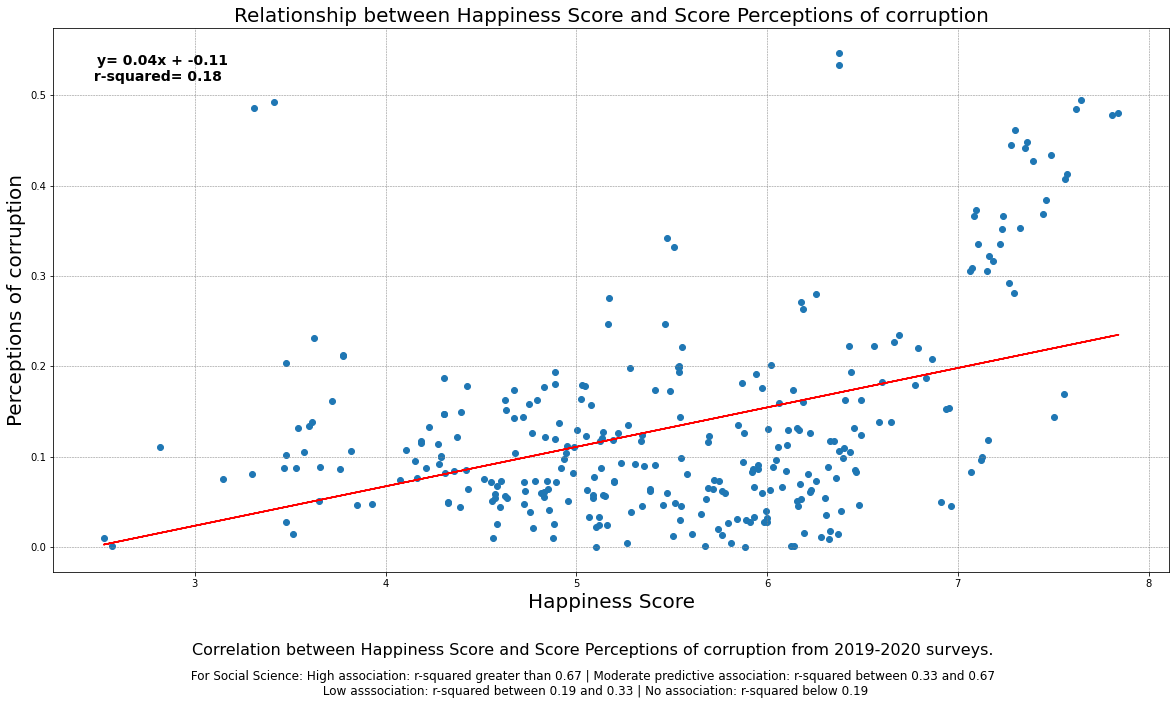

In [7]:
# Regression evaluation
for type in column_names:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data_df["Happiness Score"], data_df[type])
    regress_values = data_df["Happiness Score"] * slope + intercept
    line_equation = (f"y= {str(round(slope,2))}x + {str(round(intercept,2))}")
    # Set fig, ax to encompass plot
    fig, ax= plt.subplots(figsize= (20,10))
    # Make scatter plot
    ax.scatter(data_df["Happiness Score"], data_df[type])
    # Set x-axis label
    ax.set_xlabel("Happiness Score")
    # Set y-axis label
    ax.set_ylabel(type)
    # Set title of plot
    ax.set_title(f"Relationship between Happiness Score and Score {type}", fontsize=20)
    #  Set x-axis label
    ax.set_xlabel("Happiness Score", fontsize= 20)
    # Set y-axis label
    ax.set_ylabel(type, fontsize= 20)
    # Add a grid to the plot and style
    ax.grid()
    plt.grid(color= "gray", linestyle="--", linewidth= 0.5)
    # Add regression line to the scatter plot
    ax.plot(data_df["Happiness Score"], regress_values, "r-")
    # Display the line equation and r-squared on plot
    ax.text(0.1,0.925, (f"{line_equation} \n r-squared= {round(rvalue**2,2)}    "), horizontalalignment='center',verticalalignment='center', transform = ax.transAxes,  fontsize=14, fontweight='bold')
    # Set texts to be displayed in teh figtext
    txt_1= (f"Correlation between Happiness Score and {type} from 2019-2020 surveys.")
    txt_2= ("\n For Social Science: High association: r-squared greater than 0.67 | Moderate predictive association: r-squared between 0.33 and 0.67 \n Low asssociation: r-squared between 0.19 and 0.33 | No association: r-squared below 0.19")
    plt.figtext(0.5, 0.01, txt_1, wrap=True, horizontalalignment='center', fontsize=16)
    plt.figtext(0.5, -0.05, txt_2, wrap=True, fontsize=12, va="bottom", ha="center")
    # Save the figure
    plt.savefig(f"outputs/{type}_regression.png", dpi= 600, transparent= False)
    # Display the figure
    plt.show()
